In [1]:
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
import PIL
import cv2
from keras.constraints import maxnorm
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator


In [2]:
dataset_url = "https://drive.google.com/drive/u/0/folders/1yE7LoZaO694KJEyw0k_4BrBAzYWzUd_E"
data_dir = tf.keras.utils.get_file('Galaxy_Dataset', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/Galaxy_Dataset'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/Galaxy_Dataset')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/Galaxy_Dataset/Elliptical Galaxy/250px-ESO_306-17.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Elliptical Galaxy/250px-Messier_87_Hubble_WikiSky.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Elliptical Galaxy/600px-NGC5557_-_SDSS_DR14.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Elliptical Galaxy/250px-SDSS_NGC_1283.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Elliptical Galaxy/300px-NGC359_-_SDSS_DR14.jpg')]

In [6]:
image_count =  len(list(data_dir.glob('*/*.png')))
print(image_count)

114


In [7]:
spiral =  list(data_dir.glob('Spiral Galaxy/*'))
elliptical = list(data_dir.glob('Elliptical Galaxy/*'))
spiral[:5]

[PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1102.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC5614.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC2735.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1368.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC4394.png')]

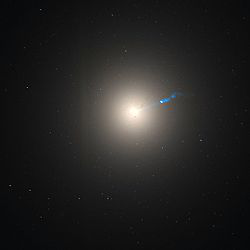

In [8]:

PIL.Image.open(str(elliptical[1]))

In [9]:
Galaxy_images_dict= {
    'disk': list(data_dir.glob('Disk Galaxy/*')),
    'elliptical': list(data_dir.glob('Elliptical Galaxy/*')),
    'irregular': list(data_dir.glob('Irregular Galaxy/*')),
    'lenticular': list(data_dir.glob('Lenticular Galaxy/*')),
    'spiral':list(data_dir.glob('Spiral Galaxy/*')),
}

In [10]:
Galaxy_labels_dict = {
    'disk':0,
    'elliptical': 1,
    'irregular': 2,
    'lenticular': 3,
    'spiral': 4,
}

In [11]:
Galaxy_images_dict['spiral'][:5]


[PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1102.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC5614.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC2735.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1368.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC4394.png')]

In [12]:
img =  cv2.imread(str(Galaxy_images_dict['disk'][0]))

In [13]:
img.shape

(300, 300, 3)

In [14]:
X, y = [],[]

for Galaxy_name, images in Galaxy_images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        if(img is  None):
            pass;
        else:
            resized_img =  cv2.resize(img,(180,180))
            X.append(resized_img)
            y.append(Galaxy_labels_dict[Galaxy_name])

In [15]:
X =  np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
num_classes = 5

model = Sequential([
    layers.Conv2D(30,(3,3), padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(30,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(30,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),  
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='softmax'),
    layers.Dense(num_classes)    
])





In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 4s 377ms/step - loss: 1.5933 - accuracy: 0.3874
Epoch 2/30
4/4 [==============================] - 2s 388ms/step - loss: 1.5560 - accuracy: 0.3874
Epoch 3/30
4/4 [==============================] - 2s 421ms/step - loss: 1.5382 - accuracy: 0.3874
Epoch 4/30
4/4 [==============================] - 2s 391ms/step - loss: 1.5196 - accuracy: 0.3874
Epoch 5/30
4/4 [==============================] - 2s 430ms/step - loss: 1.5054 - accuracy: 0.3874
Epoch 6/30
4/4 [==============================] - 2s 384ms/step - loss: 1.4930 - accuracy: 0.3874
Epoch 7/30
4/4 [==============================] - 2s 441ms/step - loss: 1.4901 - accuracy: 0.3874
Epoch 8/30
4/4 [==============================] - 2s 411ms/step - loss: 1.4764 - accuracy: 0.3784
Epoch 9/30
4/4 [==============================] - 2s 543ms/step - loss: 1.4685 - accuracy: 0.5586
Epoch 10/30
4/4 [==============================] - 2s 448ms/step - loss: 1.4587 - accuracy: 0.5676
Epoch 11/30
4/4 [==

In [20]:
model.evaluate(X_test_scaled,y_test)
model.summary()

2/2 [==============================] - 1s 131ms/step - loss: 1.4934 - accuracy: 0.4000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 30)      840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 30)        0         
___________________________________

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [22]:
y_predict =  model.predict(X_test_scaled)
y_predict_classes = [np.argmax(element) for element in y_predict]
#y_predict_classes[0]
#plt.matshow(X_test_scaled[0])

In [23]:
print("Classification Report: \n", classification_report(y_test, y_predict_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      1.00      0.65        10
           1       0.35      0.75      0.48        16
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        11

    accuracy                           0.40        55
   macro avg       0.17      0.35      0.23        55
weighted avg       0.19      0.40      0.26        55



/home/bifrost/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bifrost/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bifrost/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_classes)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[10,  0,  0,  0,  0],
       [ 4, 12,  0,  0,  0],
       [ 7,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0, 11,  0,  0,  0]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

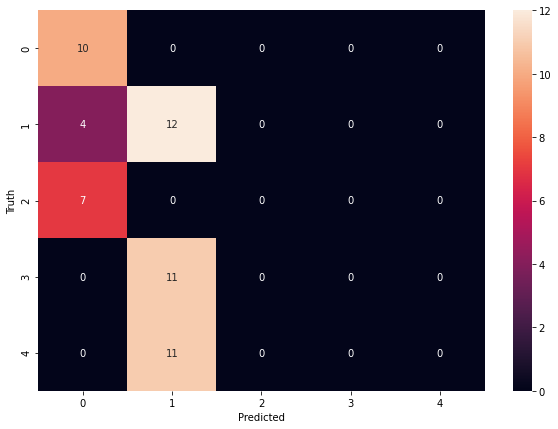

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')